In [ ]:
# 1. Get essential libraries
from vnstock import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Observations:  1384


<Axes: xlabel='Time'>

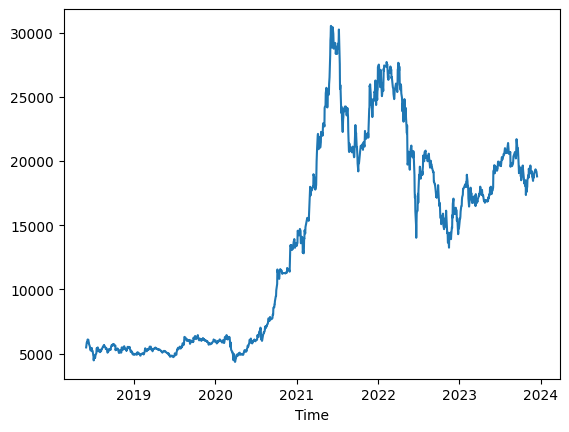

In [ ]:
#2. Fetch data and visualize
# VIB
VIB = stock_historical_data(symbol = "VIB", start_date="2018-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB["Close"].plot()

In [ ]:
# Preprocessing
df = pd.DataFrame(VIB['Close'])
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,5480
1,5880
2,5900
3,5880
4,6060
...,...
1379,19200
1380,19200
1381,19050
1382,18900


In [ ]:
# Check stationary
from statsmodels.tsa.stattools import adfuller
adf1 = adfuller(df['Close'], regression ='c', maxlag=30)
print("ADF stat: %f" % adf1[0])
print("p-value: %f" % adf1[1])
#Not stationary

ADF stat: -1.622338
p-value: 0.471504


In [ ]:
adf2 = adfuller(df['Close'].diff().dropna(), regression ='c', maxlag=30)
print("ADF stat: %f" % adf2[0])
print("p-value: %f" % adf2[1])
#Stationary

ADF stat: -5.173923
p-value: 0.000010


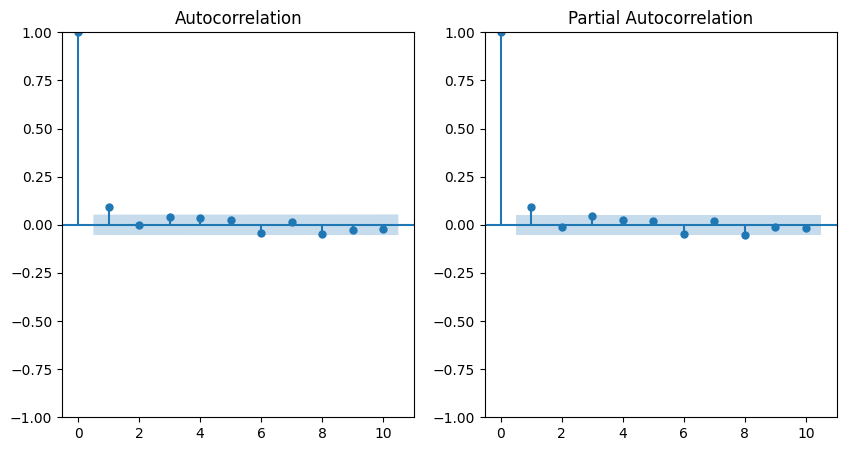

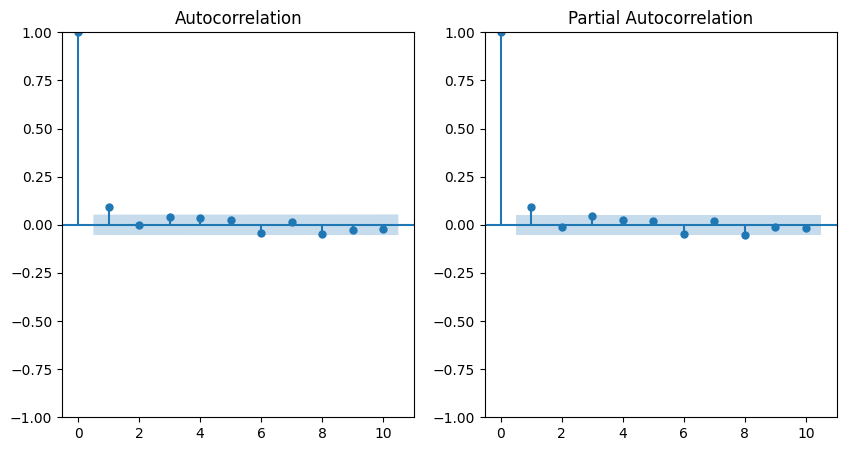

In [ ]:
# Difference the data and plot the acf
fig, ax = plt.subplots(1,2,figsize=(10,5))
#ACF
sm.graphics.tsa.plot_acf(np.diff(df['Close']),lags=10, ax=ax[0])
# PACF
sm.graphics.tsa.plot_pacf(np.diff(df['Close']),lags=10, ax=ax[1])

In [ ]:
# Test with ratio 6:4
train_size64 = int(0.6 * len(df))
test_size64 = int(0.4 * len(df))

train_data64 = df[:train_size64]
test_data64 = df[train_size64:]

In [ ]:
# Test with ratio 6:4
x_train64 = np.array(train_data64.index).reshape(-1, 1)
y_train64 = np.array(train_data64['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model64 = auto_arima(y_train64, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit64 = model64.fit(y_train64)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11758.783, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11779.034, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11759.973, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11760.151, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11779.895, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11763.424, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11764.020, Time=0.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11760.782, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11760.813, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11761.964, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11761.523, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11761.834, Time=0.18 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=11762.777, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=11758.395, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0

In [ ]:
# 6:4 RATIO
x_test64 = np.array(test_data64.index).reshape(-1, 1)
y_test64 = np.array(test_data64['Close'])
y_pred64 = model64.predict(n_periods=len(y_test64))

In [ ]:
# 6:4 RATIO
last_index64 =  df.index[-1]
last_data64 =pd.RangeIndex(start=last_index64, stop=last_index64 + 60, step=1)

#create an array of 60 integers starting from last index
x_next_60_days64 = np.array(range(last_index64 + 1, last_index64 + 61)).reshape(-1, 1)

#predict the price for the next 60 days.
y_next_60_days64 = model64.predict(len(x_next_60_days64))

#print the prices for the next 60 days.
print('Predicted prices for the next 60 days: ')
print(y_next_60_days64)

Predicted prices for the next 60 days: 
[19676.17463139 19625.62103853 19576.03333241 19527.39305861
 19479.68211531 19432.88274653 19386.97753557 19341.94939846
 19297.78157766 19254.4576358  19211.96144958 19170.27720372
 19129.38938514 19089.28277714 19049.94245377 19011.35377424
 18973.5023775  18936.37417688 18899.95535485 18864.2323579
 18829.19189144 18794.82091493 18761.10663696 18728.03651051
 18695.59822831 18663.77971821 18632.56913873 18601.95487463
 18571.92553259 18542.46993698 18513.57712569 18485.23634605
 18457.43705084 18430.16889435 18403.42172853 18377.18559926
 18351.45074255 18326.207581   18301.44672018 18277.15894518
 18253.3352171  18229.96666979 18207.04460648 18184.56049655
 18162.50597237 18140.87282622 18119.65300714 18098.83861804
 18078.42191269 18058.39529287 18038.75130552 18019.48264001
 18000.58212535 17982.04272759 17963.85754715 17946.0198163
 17928.52289659 17911.36027641 17894.52556858 17878.01250795]


In [ ]:
# 6:4 RATIO
#RMSE
test_rmse = np.sqrt(np.mean((y_pred64 - y_test64)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test64 - y_pred64) / y_test64)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred64 - y_test64))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("Testing MSLR: ", MSLE(y_pred64, y_test64))

Testing RMSE: 4220.816347061876
Testing MAPE: 14.424801194002546
Testing MAE: 3169.926116188467
Testing MSLR:  0.041940561196296


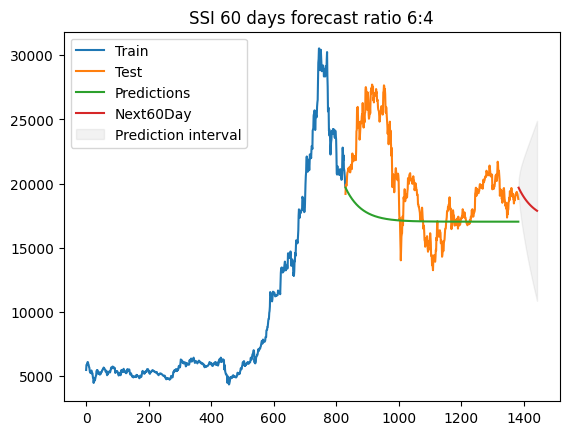

In [ ]:
# 6:4 RATIO
# Forecast
n_periods = 60
fc, confint = model_fit64.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df['Close']), len(df['Close'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train_data64.index, train_data64['Close'])
plt.plot(test_data64.index, test_data64['Close'])
plt.plot(test_data64.index, y_pred64)

plt.plot(fc_series)
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.05)
plt.legend(['Train', 'Test', 'Predictions','Next60Day', 'Prediction interval'])

plt.title("SSI 60 days forecast ratio 6:4")
plt.show()
#The ratio and the model is not a good choice for this case